# 8. lineplot을 이용한 선도표 그리기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
import pandas as pd

In [6]:
df=sns.load_dataset('flights')

In [7]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- 결측값 확인

In [8]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

- 선도표 그리기

<AxesSubplot:xlabel='year', ylabel='passengers'>

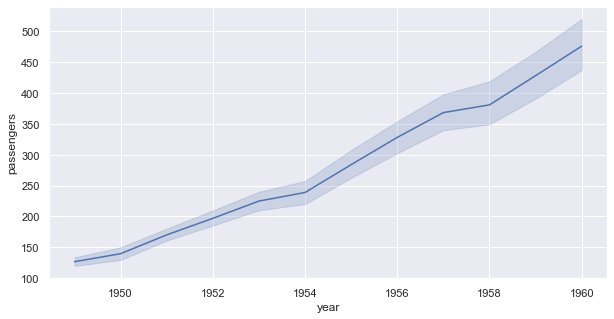

In [9]:
sns.lineplot(data=df, x='year', y='passengers')
## 그림자 같은 것은 신뢰구간
## 12개월을 따로따로가 아닌 한 그래프로 나타내었음

- xtick에 전체 년도 표시

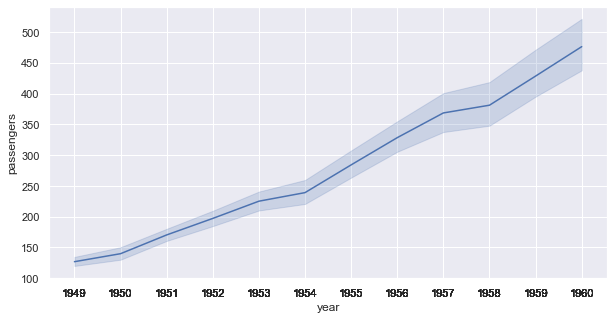

In [11]:
sns.lineplot(data=df, x='year', y='passengers')
plt.xticks(df['year']);
## ; -> text 부분이 생략되어 출력됨

- xtick 기울기 추가

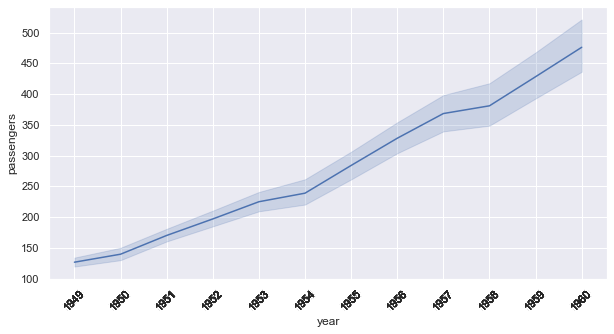

In [12]:
sns.lineplot(data=df, x='year', y='passengers')
plt.xticks(df['year'], rotation=45);

- 월별로 그리기

<AxesSubplot:xlabel='year', ylabel='passengers'>

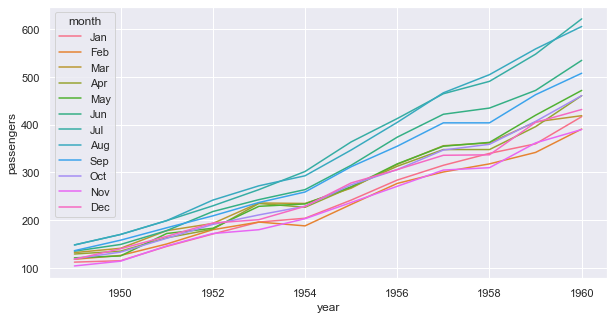

In [13]:
sns.lineplot(data=df, x='year', y='passengers', hue='month')

- 색상 변경

<AxesSubplot:xlabel='year', ylabel='passengers'>

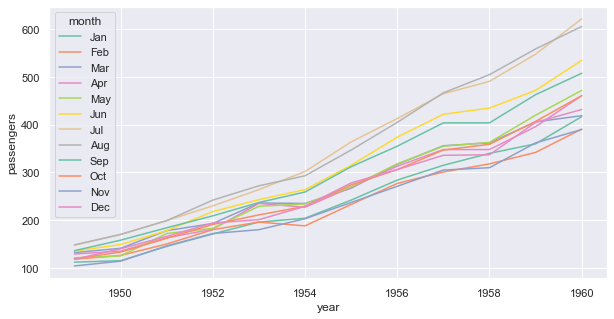

In [15]:
sns.lineplot(data=df, x='year', y='passengers', hue='month', palette='Set2')

- 선 표현 방법 변경

<AxesSubplot:xlabel='year', ylabel='passengers'>

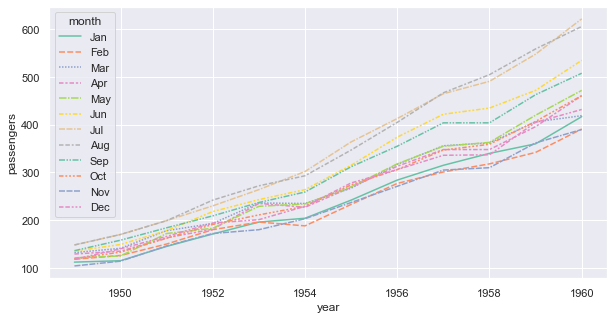

In [16]:
sns.lineplot(data=df, x='year', y='passengers', hue='month', palette='Set2', style='month')

# 9. heatmap을 이용한 히트맵 그리기

In [3]:
df=sns.load_dataset('flights')

- 데이터 형태 확인

In [4]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


- 결측값 확인

In [6]:
df.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

- 문제: 각 년도별 월별 승객수를 히트맵으로 나타내시오

pivot을 사용한 데이터 형태 변경

In [7]:
pivot_data=df.pivot('month', 'year', 'passengers')

In [8]:
pivot_data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

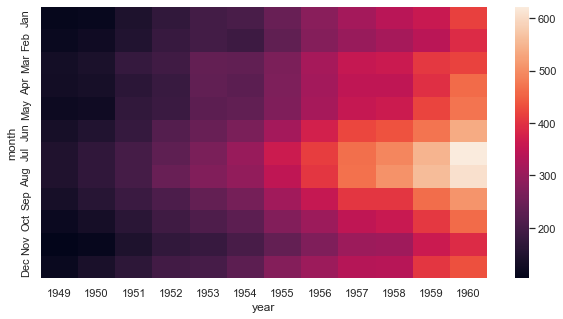

In [9]:
sns.heatmap(pivot_data)

- 구분선 추가

<AxesSubplot:xlabel='year', ylabel='month'>

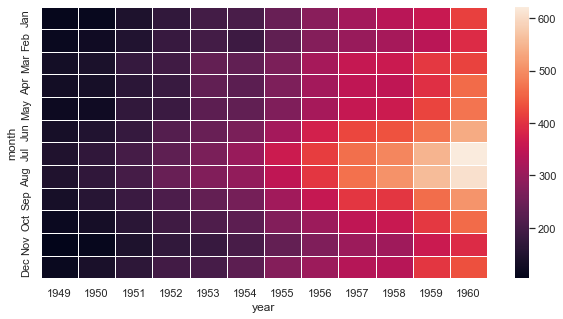

In [11]:
sns.heatmap(pivot_data, linewidths=.5)

- cmap을 통한 colorbar 색생 변경

<AxesSubplot:xlabel='year', ylabel='month'>

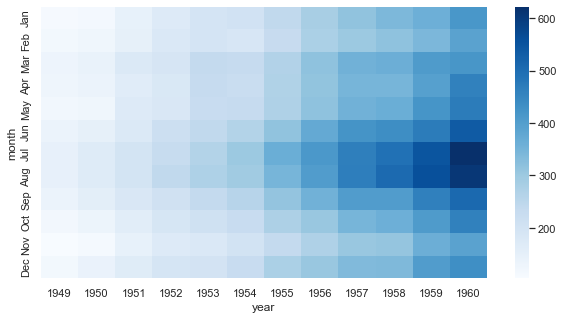

In [12]:
sns.heatmap(pivot_data, cmap='Blues')

- 수치 입력

<AxesSubplot:xlabel='year', ylabel='month'>

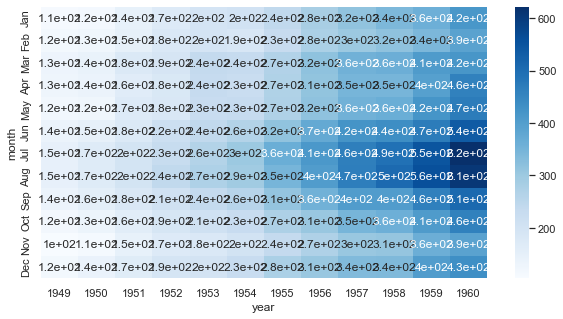

In [13]:
sns.heatmap(pivot_data, cmap='Blues', annot=True)

- 정수 형태로 출력

<AxesSubplot:xlabel='year', ylabel='month'>

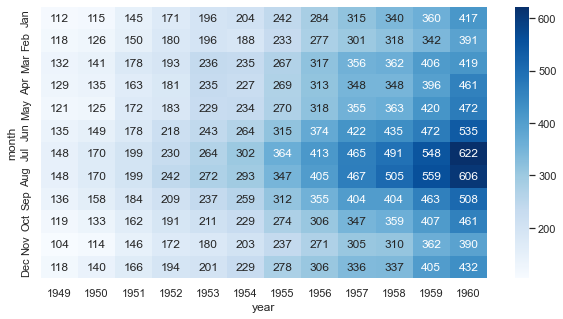

In [14]:
sns.heatmap(pivot_data, cmap='Blues', annot=True, fmt='d')

- colorbar 가로로 놓기

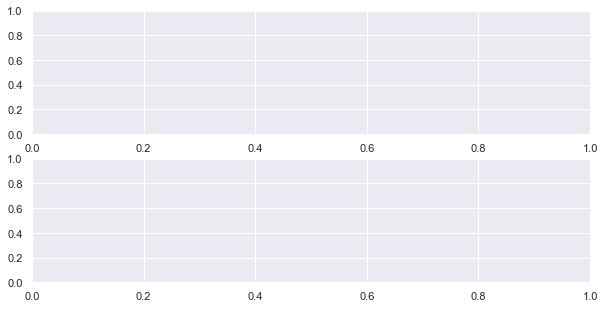

In [15]:
fig, (ax, cbar_ax)=plt.subplots(2)

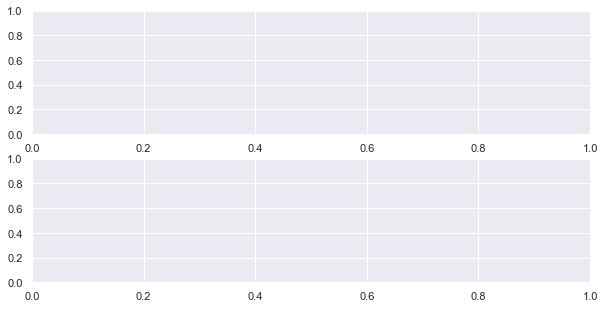

In [16]:
fig

In [17]:
ax ## 첫번째 그림

<AxesSubplot:>

In [19]:
cbar_ax ## 두번째 그림

<AxesSubplot:>

orientation:horizontal

In [20]:
ax = sns.heatmap(pivot_data, ax=ax,
                cbar_ax=cbar_ax,
                cbar_kws={'orientation':'horizontal'})

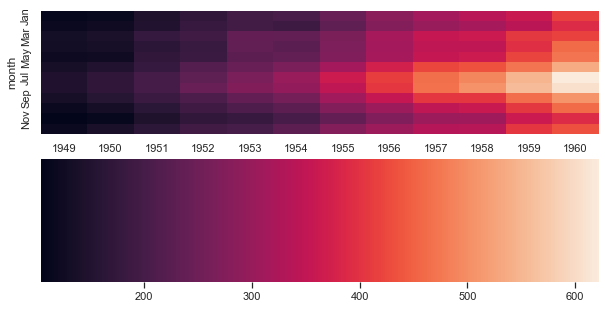

In [21]:
fig

orientation:vertical

In [23]:
ax = sns.heatmap(pivot_data, ax=ax,
                cbar_ax=cbar_ax,
                cbar_kws={'orientation':'vertical'})

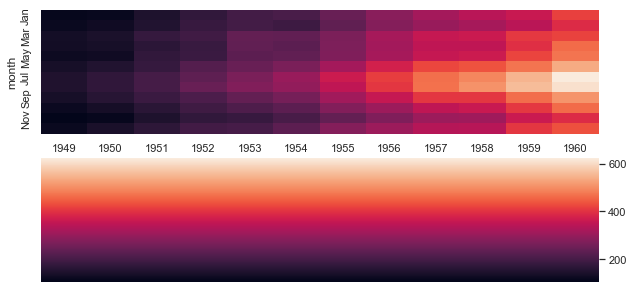

In [24]:
fig

- colorbar와 히트맵 값의 비율 조정

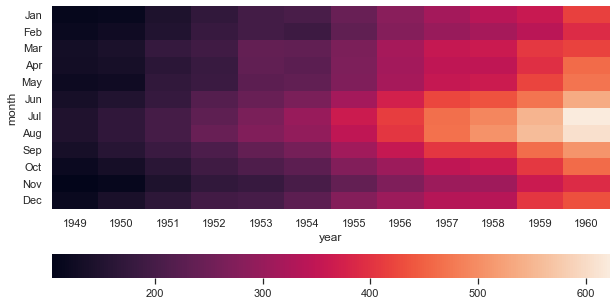

In [26]:
grid_kws={'height_ratios':(.85, .1), 'hspace':0.4}

f, (ax, cbar_ax)=plt.subplots(2, gridspec_kw=grid_kws)
ax=sns.heatmap(pivot_data, ax=ax,
              cbar_ax=cbar_ax,
              cbar_kws={'orientation':'horizontal'})

- 최종

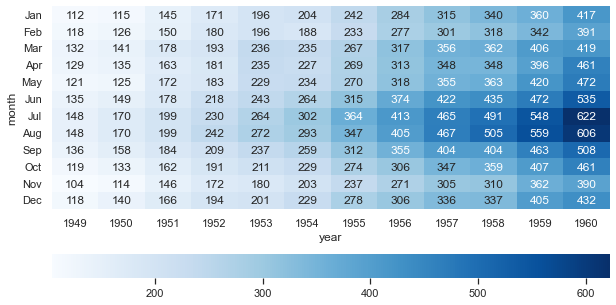

In [27]:
grid_kws={'height_ratios':(.85, .1), 'hspace':0.4}

f, (ax, cbar_ax)=plt.subplots(2, gridspec_kw=grid_kws)
ax=sns.heatmap(pivot_data, ax=ax,
              cbar_ax=cbar_ax,
              cbar_kws={'orientation':'horizontal'},
              cmap='Blues',
              annot=True, fmt='d')

# 10. pie를 이용한 원형차트 그리기

In [28]:
## 한글 사용 코드
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus']=False

In [30]:
movie_title=['크루엘라', '극장판 귀멸의 칼날:무한열차편', '학교가는 길']
audience=[664308, 2099131, 20067]

data={'영화제목':movie_title, '누적관객':audience}
df=pd.DataFrame(data)

In [31]:
df

,영화제목,누적관객
0,크루엘라,664308
1,극장판 귀멸의 칼날:무한열차편,2099131
2,학교가는 길,20067


- pie chart 생성

([<matplotlib.patches.Wedge at 0x1a37341f520>,
 [Text(0.8050313127582442, 0.7496162921646903, ''),
  Text(-0.8218010823586747, -0.731192848046335, ''),
  Text(1.0997178880085947, -0.02491117809169017, '')])

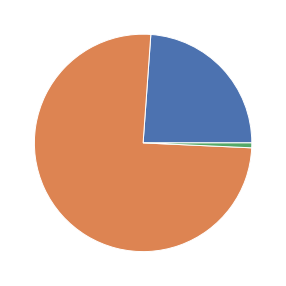

In [32]:
plt.pie(df['누적관객'])

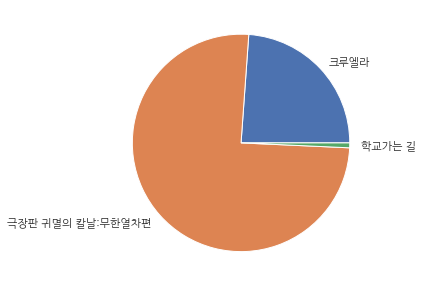

In [33]:
plt.pie(df['누적관객'], labels=df['영화제목']);

- 값 추가

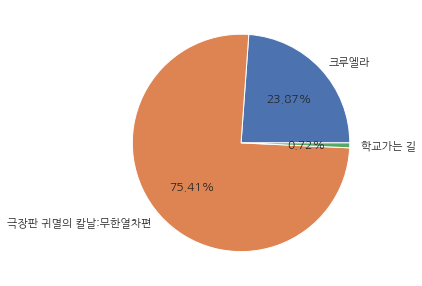

In [36]:
plt.pie(df['누적관객'], labels=df['영화제목'], autopct='%0.2f%%');
## %0.2f -> 숫자만 출력됨

- color를 이용한 색상 변경하기

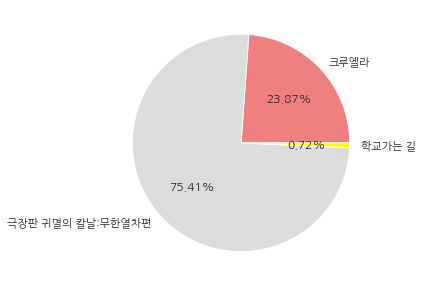

In [39]:
#colors_list=['red', 'green', 'blue'] -> 색상
colors_list=['#F08080', '#DCDCDC', '#FFF80C']

plt.pie(df['누적관객'], labels=df['영화제목'], autopct='%0.2f%%', colors=colors_list);

- explode를 이용한 중심으로부터 그림 떼어내기

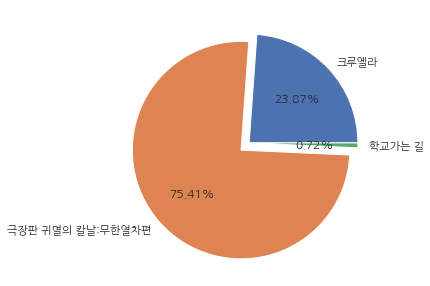

In [41]:
explode_list=[0, 0.1, 0]

plt.pie(df['누적관객'], labels=df['영화제목'], autopct='%0.2f%%', explode=explode_list);

# 11. boxplot을 이용한 상자 수염 그림 그리기

- iris 데이터 셋 로드

In [43]:
df=sns.load_dataset('iris')

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- boxplot 그리기

<AxesSubplot:>

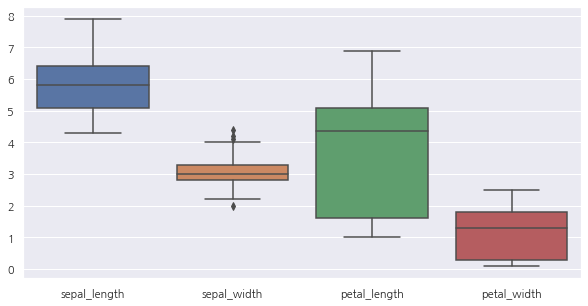

In [45]:
sns.boxplot(data=df)

## 첫번째 짝대기는 이상치를 제외한 최솟값
## 점들은 이상치

- 세로 방향 그림 크기 키우기

<AxesSubplot:>

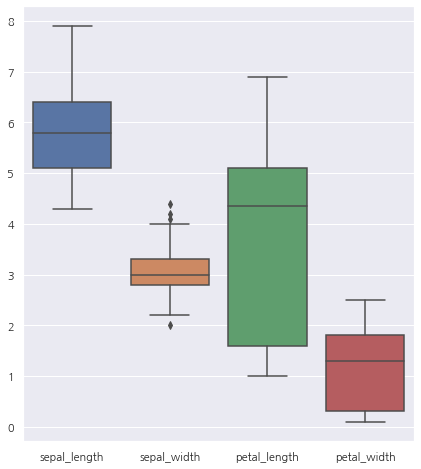

In [46]:
plt.subplots(figsize=(7, 8))
sns.boxplot(data=df)

- 가로 방향으로 그리기

<AxesSubplot:>

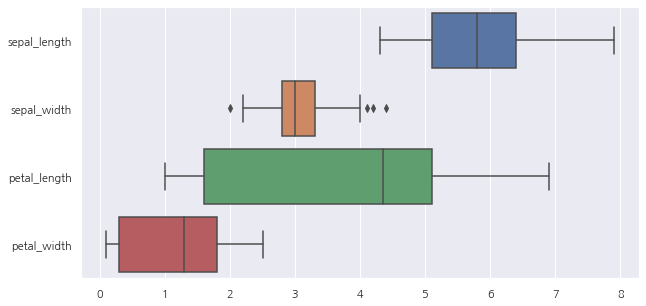

In [47]:
sns.boxplot(data=df, orient='h')

- swarmplot을 이용한 raw data 확인

C:\Users\82107\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

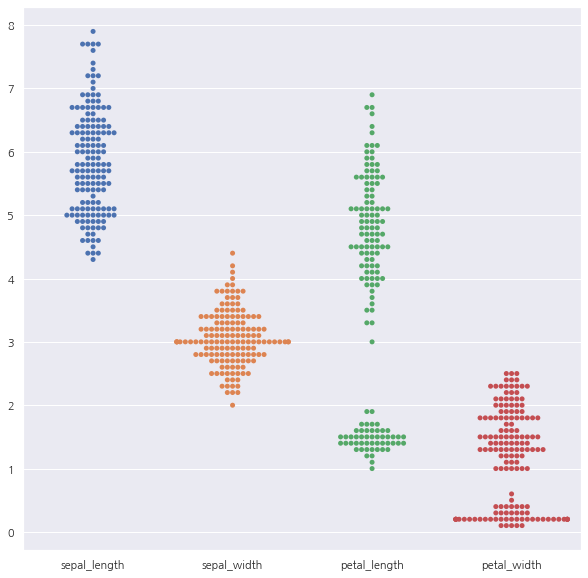

In [50]:
plt.subplots(figsize=(10, 10))
sns.swarmplot(data=df)

- 겹쳐 그리기

C:\Users\82107\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

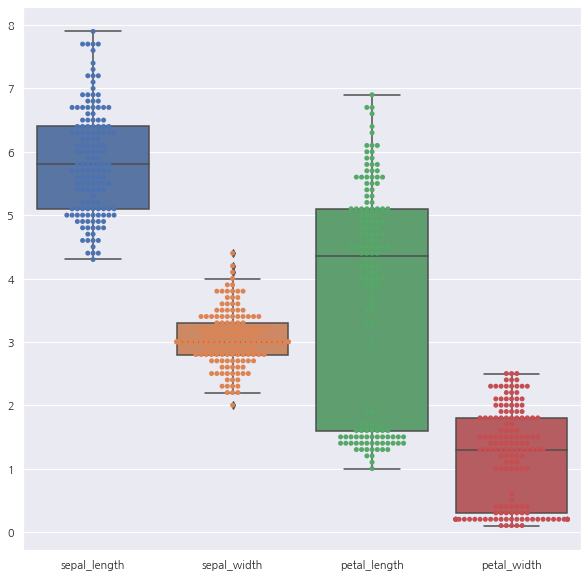

In [51]:
plt.subplots(figsize=(10, 10))
sns.boxplot(data=df)
sns.swarmplot(data=df)

- swarmplot 색상 조정

C:\Users\82107\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

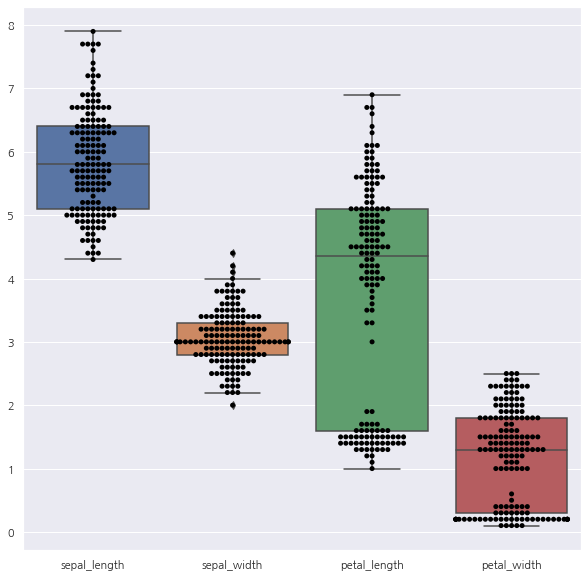

In [52]:
plt.subplots(figsize=(10, 10))
sns.boxplot(data=df)
sns.swarmplot(data=df, color='black')

- violinplot

<AxesSubplot:>

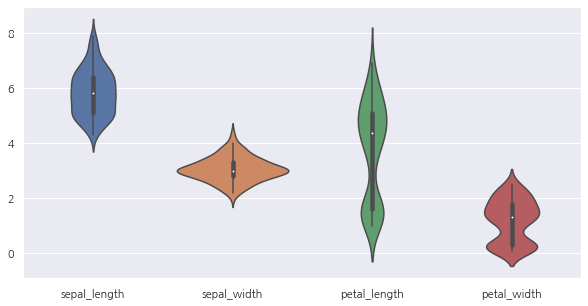

In [53]:
sns.violinplot(data=df)

- stripplot

<AxesSubplot:>

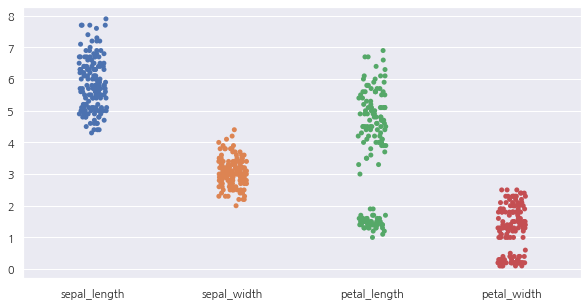

In [54]:
sns.stripplot(data=df)

# 12. displot/histplot/displot을 이용한 히스토그램 그리기

In [58]:
sns.set(rc={'figure.figsize':(15, 5)})

In [59]:
df=sns.load_dataset('iris')

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### distplot

C:\Users\82107\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

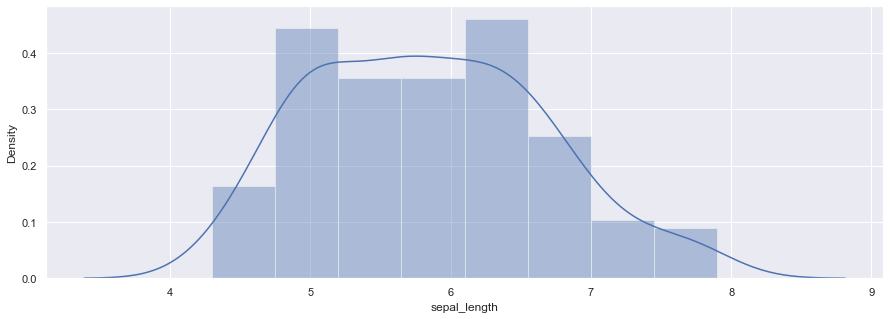

In [62]:
sns.distplot(df['sepal_length']) 
##barplot, countplot과 달리 distplot은구간이 자동적으로 설정됨

- 구간 개수 설정

C:\Users\82107\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

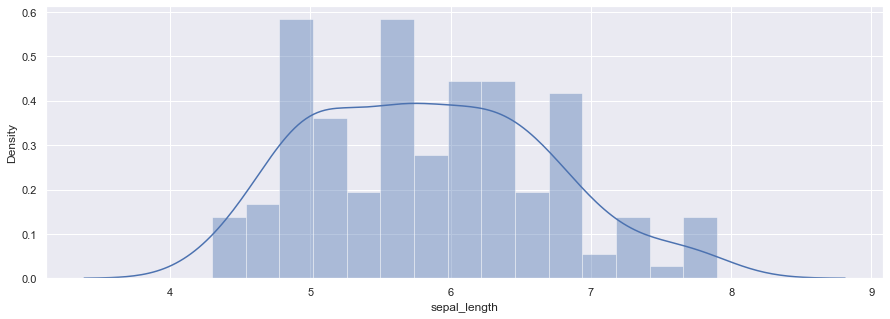

In [63]:
sns.distplot(df['sepal_length'], bins=15)

### histplot

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

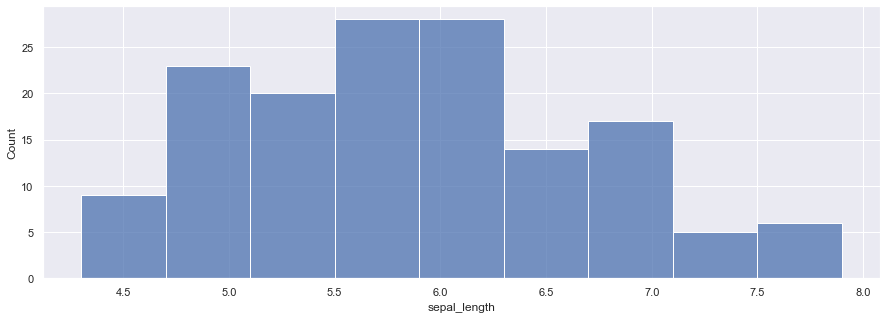

In [64]:
sns.histplot(df['sepal_length'])

- 구간 개수 설정

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

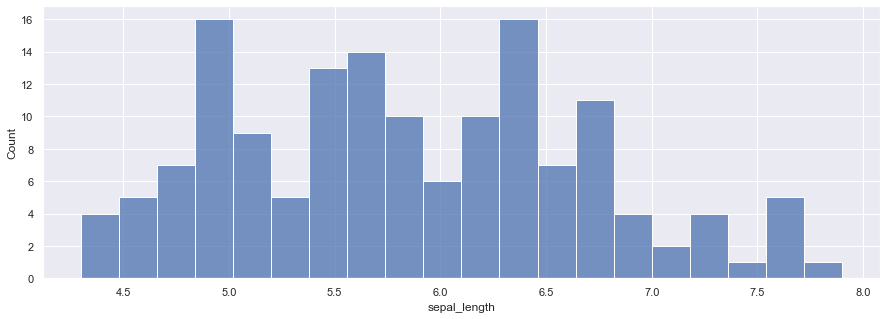

In [65]:
sns.histplot(df['sepal_length'], bins=20)

- kde 추가

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

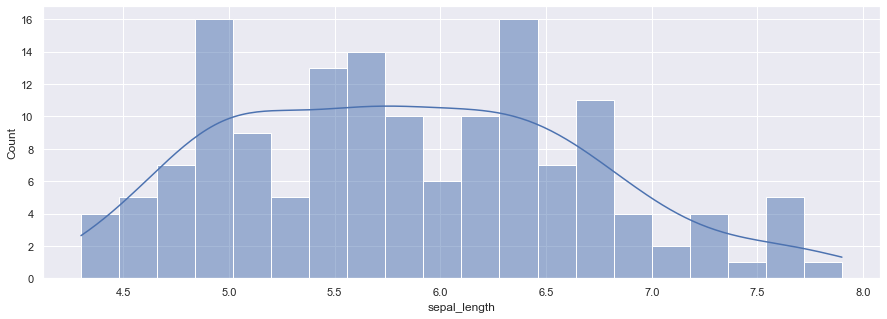

In [66]:
sns.histplot(df['sepal_length'], bins=20, kde=True)

- count -> density

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

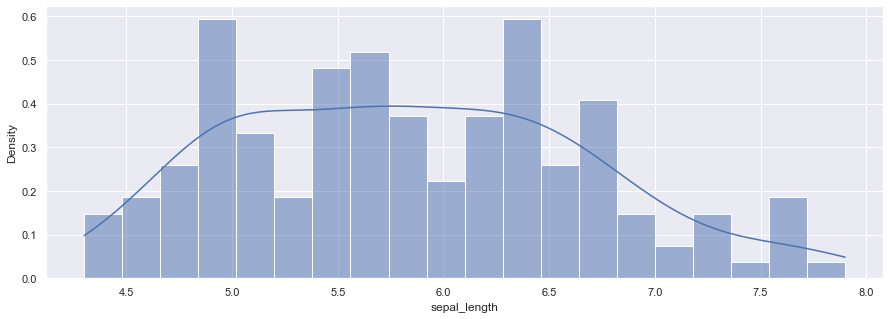

In [67]:
sns.histplot(df['sepal_length'], bins=20, kde=True, stat='density')

- 카테고리별 분류

In [71]:
## 시리즈 형태여서 오류생김
sns.histplot(df['sepal_length'], bins=20, kde=True, stat='density', hue='species')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

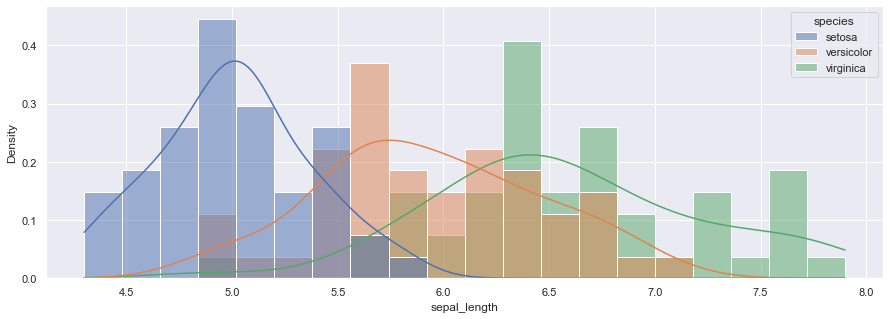

In [72]:
sns.histplot(data=df, x='sepal_length', bins=20, kde=True, stat='density', hue='species')

- x축, y축 변경

<AxesSubplot:xlabel='Density', ylabel='sepal_length'>

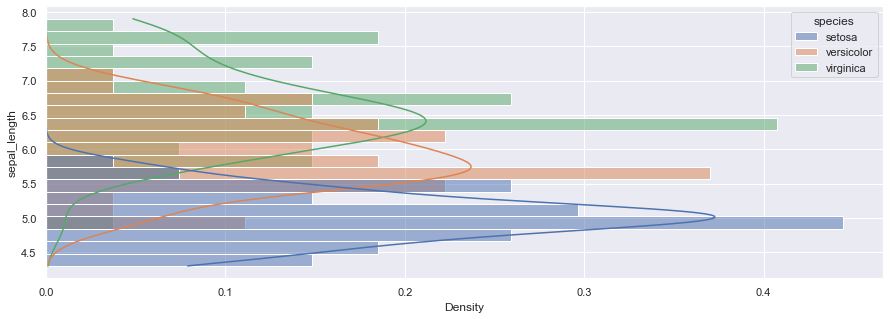

In [74]:
sns.histplot(data=df, y='sepal_length', bins=20, kde=True, stat='density', hue='species')

- 차원 추가

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

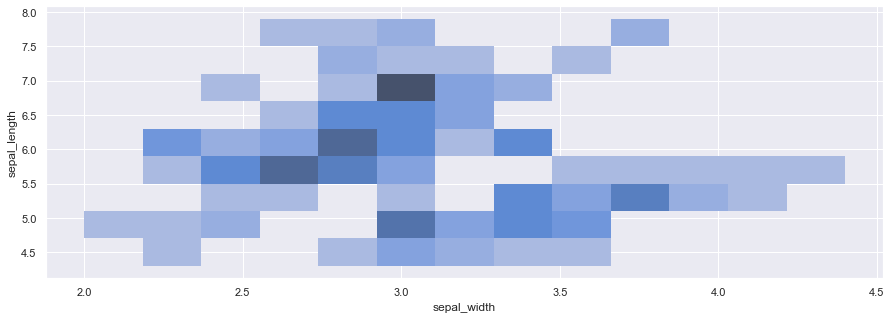

In [75]:
sns.histplot(data=df, y='sepal_length', x='sepal_width')

- colorbar 추가

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

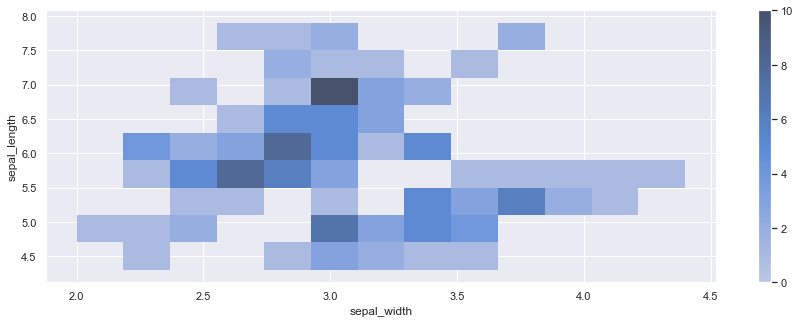

In [76]:
sns.histplot(data=df, y='sepal_length', x='sepal_width', cbar=True)

### distplot

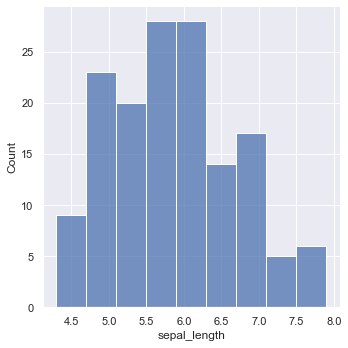

In [77]:
## 시리즈 형태
sns.displot(df['sepal_length'])

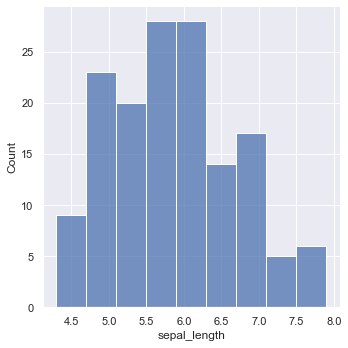

In [78]:
## 데이터프레임 형태
sns.displot(data=df, x='sepal_length')

- 그림 크기 변경

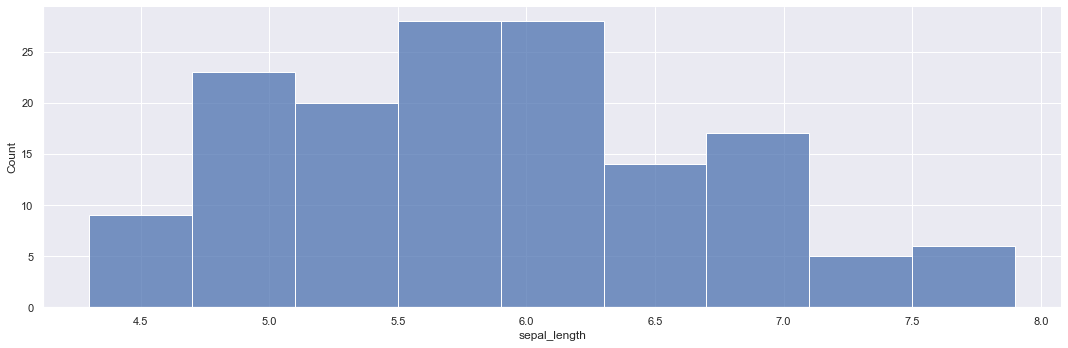

In [79]:
sns.displot(data=df, x='sepal_length', height=5, aspect=3)
## aspect를 쓰면 width까지 설정할 수 있음
## width=height*aspect

- histplot과 한 옵션 사용(1)

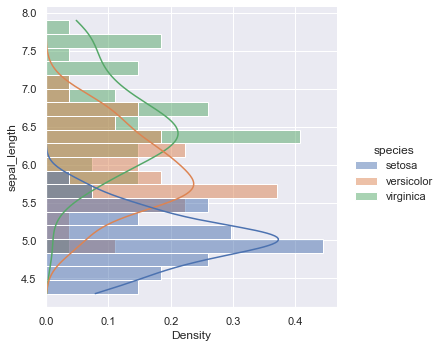

In [80]:
a=sns.displot(data=df, y='sepal_length', bins=20, kde=True, stat='density', hue='species')

- histplot과 한 옵션 사용(2)

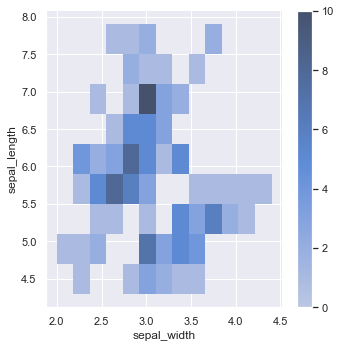

In [81]:
sns.displot(data=df, y='sepal_length', x='sepal_width', cbar=True)

### jointplot

- 기본 사용법

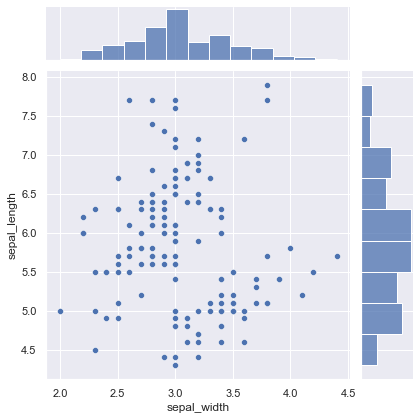

In [82]:
sns.jointplot(data=df, x='sepal_width', y='sepal_length')

- histplot의 형식으로 변경

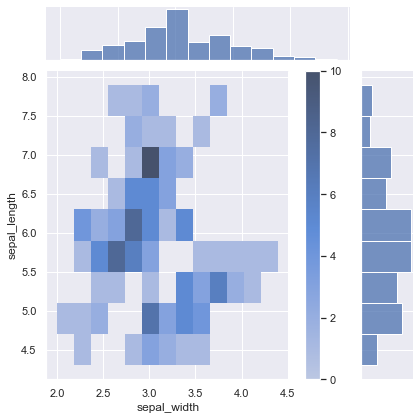

In [83]:
sns.jointplot(data=df, x='sepal_width', y='sepal_length', kind='hist', cbar=True)

- 그림 크기 변경(정사각형의 형태

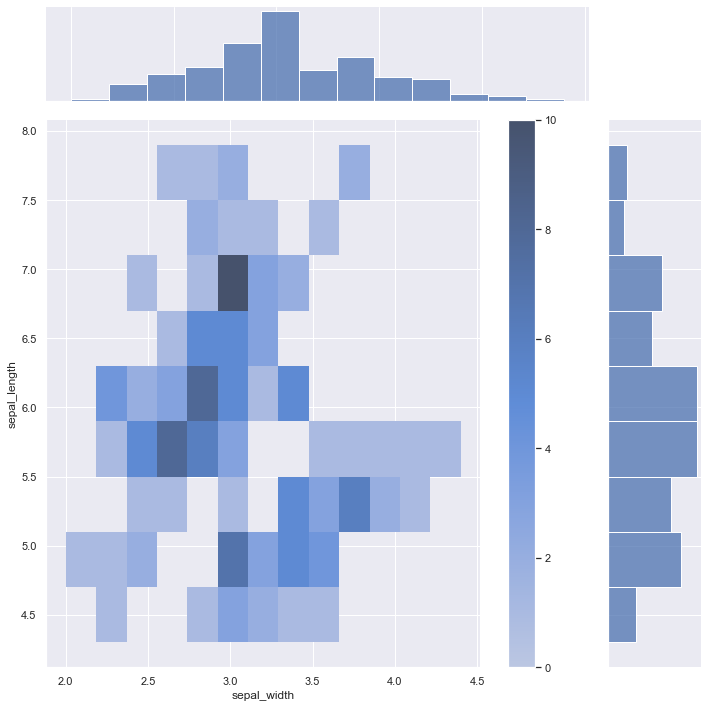

In [84]:
sns.jointplot(data=df, x='sepal_width', y='sepal_length', kind='hist', cbar=True, height=10)

# 13. pandas-profiling을 통한 EDA

EDA : 탐색적 데이터 분석 방법

In [86]:
# 아래 셀 실행 이후 런타임 -> 런타임 다시 시작

In [88]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [89]:
from pandas_profiling import ProfileReport
## from -> 판다스 프로파일링 중에 프로파일리포트만 쓰겠다

In [90]:
df=sns.load_dataset('iris')

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
profile=ProfileReport(df)

In [93]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]